In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [3]:
from sklearn.datasets import fetch_openml

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)


In [4]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [5]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [6]:
from sklearn.model_selection import train_test_split
train_img , test_img ,train_lbl , test_lbl = train_test_split( mnist.data , mnist.target , test_size = 1/7.0  ,   random_state =  0 )


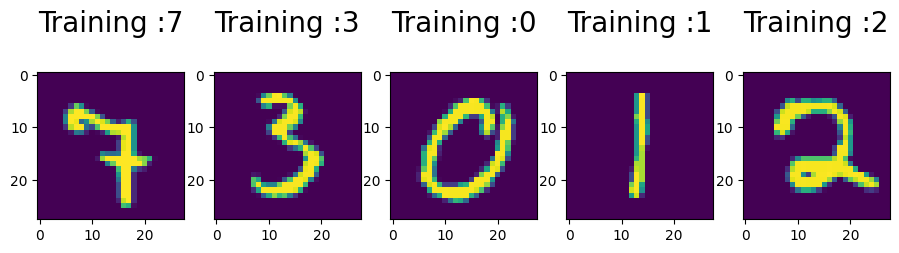

In [7]:
plt.figure(figsize=(11, 11))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap='viridis'	)
    plt.title('Training :%i\n ' % int(label), fontsize=20)  # Converted label to int


In [8]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver='lbfgs')


logisticRegr.fit(train_img, train_lbl)


In [31]:
logisticRegr.fit(train_img, train_lbl)

'''  
 from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_img_scaled = scaler.fit_transform(train_img)
test_img_scaled = scaler.transform(test_img)

logisticRegr.fit(train_img_scaled, train_lbl)
score = logisticRegr.score(test_img_scaled, test_lbl)
print(f"Improved Accuracy: {score}")
'''

c:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'  \n from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\ntrain_img_scaled = scaler.fit_transform(train_img)\ntest_img_scaled = scaler.transform(test_img)\n\nlogisticRegr.fit(train_img_scaled, train_lbl)\nscore = logisticRegr.score(test_img_scaled, test_lbl)\nprint(f"Improved Accuracy: {score}")\n'

In [23]:
# Returns a NumPy Array
# Predict for One Observation (image)
sharon = logisticRegr.predict(test_img[0].reshape(1,-1))


In [11]:
polanski = test_img[0].reshape(1,784)

In [24]:
score = logisticRegr.score(test_img, test_lbl)
print(score)


0.9184


In [13]:
kaka = logisticRegr.predict(test_img[0:10])


In [14]:
predictions = logisticRegr.predict(test_img)


In [15]:
predictions[0:11]

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7', '1'],
      dtype=object)

In [16]:
kaka

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [ ]:
misclassifiedIndexes =[]
for i , ( actual , predicted )  in enumerate( zip( test_lbl , predictions )):
    if actual != predicted :
        print( 'actual{}  , predicted{}' .format(actual, predicted ))
        misclassifiedIndexes.append(i)

actual7  , predicted4
actual9  , predicted7
actual3  , predicted9
actual5  , predicted8
actual8  , predicted2
actual2  , predicted3
actual9  , predicted2
actual8  , predicted4
actual3  , predicted9
actual3  , predicted5
actual8  , predicted1
actual5  , predicted3
actual4  , predicted7
actual8  , predicted3
actual4  , predicted2
actual5  , predicted3
actual9  , predicted4
actual3  , predicted9
actual8  , predicted3
actual8  , predicted2
actual9  , predicted7
actual8  , predicted5
actual3  , predicted2
actual3  , predicted2
actual4  , predicted7
actual2  , predicted8
actual3  , predicted5
actual3  , predicted8
actual9  , predicted8
actual8  , predicted4
actual8  , predicted5
actual9  , predicted4
actual8  , predicted1
actual2  , predicted4
actual9  , predicted5
actual5  , predicted8
actual9  , predicted7
actual2  , predicted0
actual5  , predicted6
actual8  , predicted7
actual3  , predicted2
actual2  , predicted3
actual5  , predicted9
actual7  , predicted9
actual4  , predicted6
actual8  ,

In [18]:
df = pd.DataFrame(list(zip(test_lbl, predictions)), columns=['Actual Label', 'Predicted Label'])
df.head(50)

,Actual Label,Predicted Label
0,0,0
1,4,4
2,1,1
3,2,2
4,7,4
5,9,7
6,7,7
7,1,1
8,1,1
9,7,7


In [19]:
misclassifiedIndexes

[4,
 5,
 18,
 61,
 78,
 82,
 134,
 141,
 161,
 179,
 189,
 192,
 194,
 197,
 211,
 219,
 224,
 256,
 259,
 268,
 273,
 276,
 332,
 337,
 345,
 352,
 354,
 358,
 381,
 394,
 407,
 412,
 414,
 428,
 429,
 442,
 460,
 477,
 519,
 557,
 568,
 595,
 605,
 607,
 617,
 621,
 632,
 643,
 647,
 649,
 663,
 670,
 673,
 680,
 688,
 698,
 710,
 720,
 749,
 750,
 757,
 758,
 761,
 778,
 787,
 807,
 814,
 826,
 827,
 833,
 854,
 880,
 895,
 902,
 937,
 942,
 978,
 988,
 990,
 998,
 1003,
 1024,
 1047,
 1057,
 1060,
 1066,
 1076,
 1110,
 1148,
 1152,
 1220,
 1224,
 1235,
 1253,
 1320,
 1323,
 1331,
 1336,
 1340,
 1380,
 1385,
 1404,
 1408,
 1432,
 1490,
 1504,
 1511,
 1514,
 1529,
 1550,
 1559,
 1563,
 1575,
 1583,
 1588,
 1591,
 1605,
 1609,
 1619,
 1629,
 1698,
 1718,
 1720,
 1747,
 1772,
 1825,
 1836,
 1840,
 1844,
 1856,
 1857,
 1880,
 1892,
 1918,
 1929,
 1955,
 1965,
 1981,
 2001,
 2009,
 2022,
 2051,
 2064,
 2094,
 2124,
 2129,
 2135,
 2174,
 2210,
 2213,
 2239,
 2245,
 2247,
 2258,
 2265,
 22

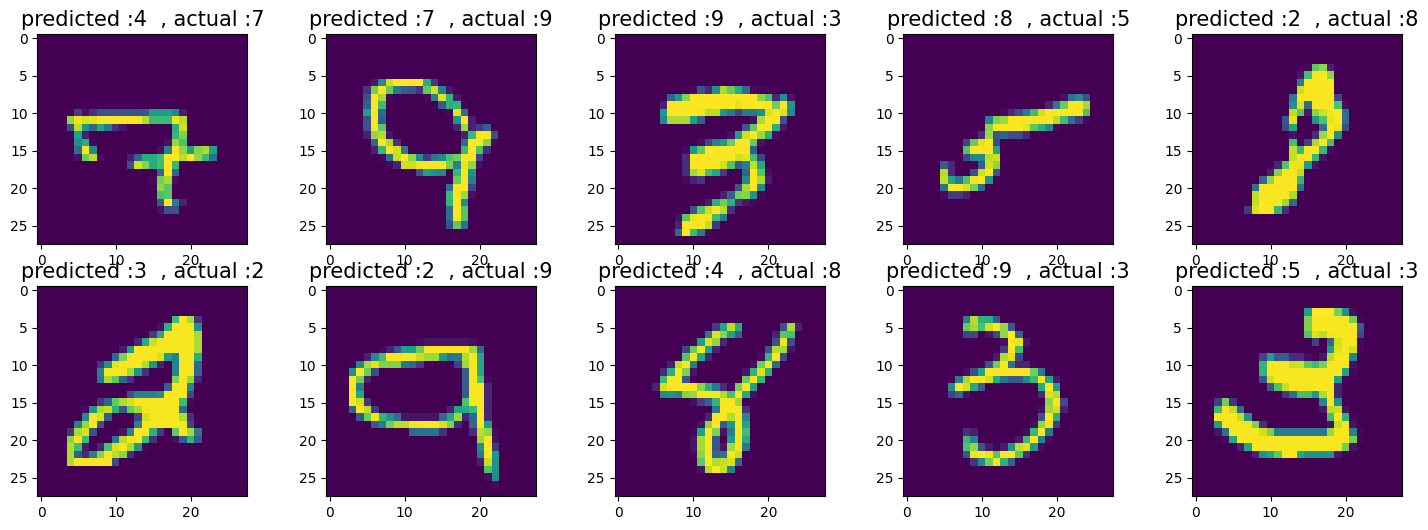

In [20]:
plt.figure( figsize=( 18 , 6 ))
for plotindex , badindex  in enumerate( misclassifiedIndexes[0:10]):
    plt.subplot(2, 5, plotindex +1) 
    plt.imshow( np.reshape( test_img[badindex] , ( 28,28))  , cmap='viridis')
    plt.title( 'predicted :{}  , actual :{}'.format(predictions[badindex]  , test_lbl[badindex]), fontsize= 15 )

heatmap

In [26]:
from sklearn import metrics


In [28]:
cm = metrics.confusion_matrix( test_lbl, predictions)
print(cm)


[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


Text(0.5, 1.0, 'Accuracy Score: 0.9184')

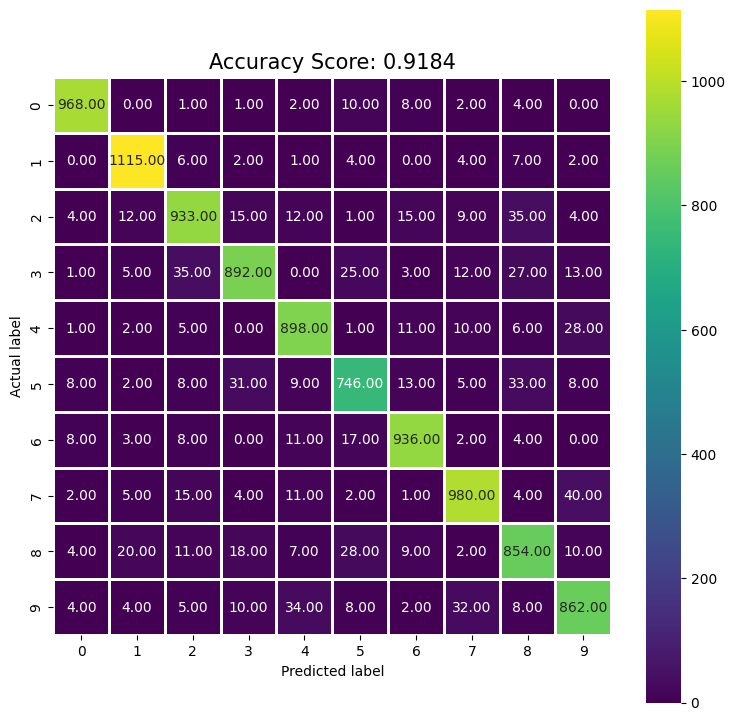

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.8, square = True, cmap = 'viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)


In [ ]:
test_img